<a href="https://colab.research.google.com/github/lohitmarla-uconn/Freight-Service-Index-Forecasting/blob/main/Copy_of_Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;New&#41; Try the Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  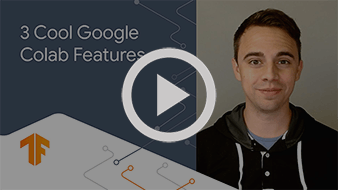
  </a>
</center>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
..............done with reading .............. 
..............done with preprocessing train data .............. 
..............done with preprocessing test data .............. 
..............done with preprocessing validation data .............. 
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.259874 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9712
[LightGBM] [Info] Number of data points in the train set: 228415, number of used features: 4223
[LightGBM] [Info] Start training from score 5.974761
..............done with training model .............. 
Test Mean Absolute Error: 4.0191957317586
Validation Mean Absolute Error: 3.9058793306922652


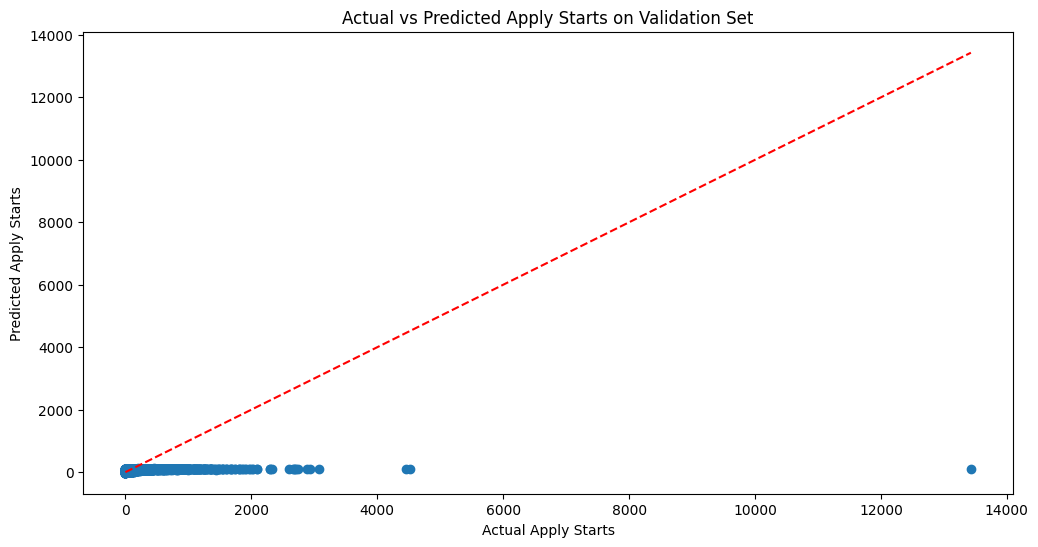

<Figure size 640x480 with 0 Axes>

In [ ]:


# mount google drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
import matplotlib.pyplot as plt

# Function to preprocess the data
def preprocess_data(df, column_transformer=None, fit_transform=True):
    # Handle missing values
    df.dropna(inplace=True)

    # Separate features and target variable
    X = df.drop(['total_apply_starts'], axis=1)
    y = df['total_apply_starts']

    # Define categorical and numerical columns
    categorical_columns = ['actual_title', 'job_state', 'job_city', 'advertiser_name', 'job_category', 'job_shift', 'employee_count']
    numerical_columns = [col for col in X.columns if col not in categorical_columns]

    # Create a column transformer with one-hot encoding for categorical variables
    if column_transformer is None:
        column_transformer = ColumnTransformer(
            transformers=[
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
                ('num', StandardScaler(), numerical_columns)
            ]
        )

    # Apply transformations
    if fit_transform:
        X = column_transformer.fit_transform(X)
    else:
        X = column_transformer.transform(X)

    return X, y, column_transformer

# Load the datasets
df_train = pd.read_csv('/content/drive/MyDrive/train_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test_data.csv')
df_val = pd.read_csv('/content/drive/MyDrive/val_data.csv')

print("..............done with reading .............. ")

# Downsample the training data for quicker iterations (if needed)
df_train = df_train.sample(frac=0.1, random_state=42)

# Preprocess training data
X_train, y_train, column_transformer = preprocess_data(df_train)
print("..............done with preprocessing train data .............. ")

# Preprocess test data
X_test, y_test, _ = preprocess_data(df_test, column_transformer, fit_transform=False)
print("..............done with preprocessing test data .............. ")

# Preprocess validation data
X_val, y_val, _ = preprocess_data(df_val, column_transformer, fit_transform=False)
print("..............done with preprocessing validation data .............. ")

# Define the LightGBM model
model = lgb.LGBMRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
model.fit(X_train, y_train)
print("..............done with training model .............. ")

# Evaluate the model on the test set
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f'Test Mean Absolute Error: {test_mae}')

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
print(f'Validation Mean Absolute Error: {val_mae}')

# Plot actual vs predicted values for validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_val, y_val_pred)
plt.xlabel('Actual Apply Starts')
plt.ylabel('Predicted Apply Starts')
plt.title('Actual vs Predicted Apply Starts on Validation Set')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--')
plt.show()

plt.savefig('lightgbm.png')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
..............done with reading .............. 
..............done with preprocessing train data .............. 
..............done with preprocessing test data .............. 
..............done with preprocessing validation data .............. 
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 3.512240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8012
[LightGBM] [Info] Number of data points in the train set: 182732, number of used features: 3373
[LightGBM] [Info] Start training from score 6.008838
Fold MAE: 2.4906745203105687
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 4.690148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

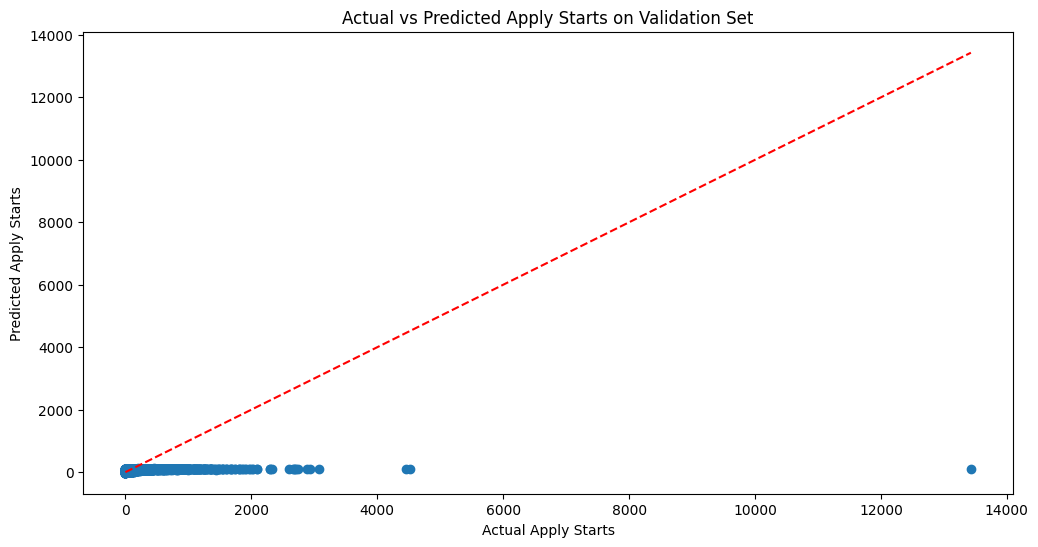

<Figure size 640x480 with 0 Axes>

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
import matplotlib.pyplot as plt

# Function to preprocess the data
def preprocess_data(df, column_transformer=None, fit_transform=True):
    # Handle missing values
    df.dropna(inplace=True)

    # Separate features and target variable
    X = df.drop(['total_apply_starts'], axis=1)
    y = df['total_apply_starts']

    # Define categorical and numerical columns
    categorical_columns = ['actual_title', 'job_state', 'job_city', 'advertiser_name', 'job_category', 'job_shift', 'employee_count']
    numerical_columns = [col for col in X.columns if col not in categorical_columns]

    # Create a column transformer with one-hot encoding for categorical variables
    if column_transformer is None:
        column_transformer = ColumnTransformer(
            transformers=[
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
                ('num', StandardScaler(), numerical_columns)
            ]
        )

    # Apply transformations
    if fit_transform:
        X = column_transformer.fit_transform(X)
    else:
        X = column_transformer.transform(X)

    return X, y.to_numpy(), column_transformer  # Convert y to numpy array

# Load the datasets
df_train = pd.read_csv('/content/drive/MyDrive/train_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test_data.csv')
df_val = pd.read_csv('/content/drive/MyDrive/val_data.csv')

print("..............done with reading .............. ")

# Downsample the training data for quicker iterations (if needed)
df_train = df_train.sample(frac=0.1, random_state=42)

# Preprocess training data
X_train, y_train, column_transformer = preprocess_data(df_train)
print("..............done with preprocessing train data .............. ")

# Preprocess test data
X_test, y_test, _ = preprocess_data(df_test, column_transformer, fit_transform=False)
print("..............done with preprocessing test data .............. ")

# Preprocess validation data
X_val, y_val, _ = preprocess_data(df_val, column_transformer, fit_transform=False)
print("..............done with preprocessing validation data .............. ")

# Define the LightGBM model
model = lgb.LGBMRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_maes = []

for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

    # Train the model
    model.fit(X_fold_train, y_fold_train)

    # Validate the model
    y_fold_val_pred = model.predict(X_fold_val)
    fold_mae = mean_absolute_error(y_fold_val, y_fold_val_pred)
    fold_maes.append(fold_mae)
    print(f'Fold MAE: {fold_mae}')

# Calculate the average MAE across all folds
avg_fold_mae = np.mean(fold_maes)
print(f'Average Fold MAE: {avg_fold_mae}')

# Train the model on the entire training data
model.fit(X_train, y_train)
print("..............done with training model on full data .............. ")

# Evaluate the model on the test set
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f'Test Mean Absolute Error: {test_mae}')

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
print(f'Validation Mean Absolute Error: {val_mae}')

# Plot actual vs predicted values for validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_val, y_val_pred)
plt.xlabel('Actual Apply Starts')
plt.ylabel('Predicted Apply Starts')
plt.title('Actual vs Predicted Apply Starts on Validation Set')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--')
plt.show()

plt.savefig('lightgbm.png')


In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.1 MB/s eta 0:00:00


..............done with reading .............. 
..............done with preprocessing train data .............. 
..............done with preprocessing test data .............. 


[I 2024-06-23 09:22:33,474] A new study created in memory with name: no-name-f9f7a0dd-7901-494e-8430-6a0cd7d269ae


..............done with preprocessing validation data .............. 
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 12.781808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13546
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 6140
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2024-06-23 09:23:31,306] Trial 0 finished with value: 4.12394663540017 and parameters: {'n_estimators': 86, 'learning_rate': 0.07539877864097437, 'num_leaves': 22, 'max_depth': 4, 'min_child_samples': 68, 'subsample': 0.6563574473663101, 'colsample_bytree': 0.6969220359975996, 'reg_alpha': 2.8446130257362094, 'reg_lambda': 3.404536080462723}. Best is trial 0 with value: 4.12394663540017.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 55.834323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11876
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 5305
[LightGBM] [Info] Start training from score 5.988490


[I 2024-06-23 09:25:40,196] Trial 1 finished with value: 4.428321167749681 and parameters: {'n_estimators': 62, 'learning_rate': 0.04993089387512359, 'num_leaves': 6, 'max_depth': 4, 'min_child_samples': 77, 'subsample': 0.5543809966498243, 'colsample_bytree': 0.9441972155782463, 'reg_alpha': 3.0683804515297703, 'reg_lambda': 2.0524671677330097}. Best is trial 0 with value: 4.12394663540017.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 293.306607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 43130
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 20932
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2024-06-23 09:37:07,629] Trial 2 finished with value: 6.202056329827584 and parameters: {'n_estimators': 163, 'learning_rate': 0.005369479498296478, 'num_leaves': 60, 'max_depth': 4, 'min_child_samples': 19, 'subsample': 0.5763345728765071, 'colsample_bytree': 0.6280476562139231, 'reg_alpha': 5.007441836927021, 'reg_lambda': 7.82068326382654}. Best is trial 0 with value: 4.12394663540017.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.332292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 347558
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 173146
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[I 2024-06-23 09:40:24,102] Trial 3 finished with value: 5.458698104839128 and parameters: {'n_estimators': 154, 'learning_rate': 0.007444290152868164, 'num_leaves': 230, 'max_depth': 9, 'min_child_samples': 11, 'subsample': 0.8457074783210974, 'colsample_bytree': 0.6443651086779076, 'reg_alpha': 3.0188505961481473, 'reg_lambda': 1.935914669922443}. Best is trial 0 with value: 4.12394663540017.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 71.828943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12604
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 5669
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-06-23 09:43:18,926] Trial 4 finished with value: 4.09546397411401 and parameters: {'n_estimators': 112, 'learning_rate': 0.055381856352324496, 'num_leaves': 153, 'max_depth': 4, 'min_child_samples': 74, 'subsample': 0.6008966492916321, 'colsample_bytree': 0.7356402773569595, 'reg_alpha': 8.389064607354738, 'reg_lambda': 2.315225127577884}. Best is trial 4 with value: 4.09546397411401.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.220056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 73110
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 35922
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2024-06-23 09:44:02,977] Trial 5 finished with value: 4.370636293480516 and parameters: {'n_estimators': 68, 'learning_rate': 0.03946285192684819, 'num_leaves': 161, 'max_depth': 8, 'min_child_samples': 15, 'subsample': 0.9734136866796632, 'colsample_bytree': 0.6355236776164315, 'reg_alpha': 9.854502748636598, 'reg_lambda': 3.0041769654481785}. Best is trial 4 with value: 4.09546397411401.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 63.677859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11876
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 5305
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-06-23 09:46:37,921] Trial 6 finished with value: 4.126242920934097 and parameters: {'n_estimators': 123, 'learning_rate': 0.05819369589459714, 'num_leaves': 82, 'max_depth': 3, 'min_child_samples': 77, 'subsample': 0.7665052523051794, 'colsample_bytree': 0.9520769722084141, 'reg_alpha': 9.44020703385855, 'reg_lambda': 2.8091687900358338}. Best is trial 4 with value: 4.09546397411401.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 84.169268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32144
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 15439
[LightGBM] [Info] Start training from score 5.988490


[I 2024-06-23 09:50:34,744] Trial 7 finished with value: 4.958263331703822 and parameters: {'n_estimators': 138, 'learning_rate': 0.03784777243014296, 'num_leaves': 2, 'max_depth': 7, 'min_child_samples': 28, 'subsample': 0.5893053676452666, 'colsample_bytree': 0.5034505550934072, 'reg_alpha': 9.132454266598224, 'reg_lambda': 9.079483916986023}. Best is trial 4 with value: 4.09546397411401.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 41.218896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22260
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 10497
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-06-23 09:52:40,354] Trial 8 finished with value: 7.591301171665761 and parameters: {'n_estimators': 79, 'learning_rate': 0.0040422827491269075, 'num_leaves': 214, 'max_depth': 8, 'min_child_samples': 38, 'subsample': 0.6831330280798733, 'colsample_bytree': 0.947464809593141, 'reg_alpha': 6.165192981460122, 'reg_lambda': 6.945324169650769}. Best is trial 4 with value: 4.09546397411401.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 68.633141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12604
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 5669
[LightGBM] [Info] Start training from score 5.988490


[I 2024-06-23 09:56:00,129] Trial 9 finished with value: 4.014106224568221 and parameters: {'n_estimators': 196, 'learning_rate': 0.037174061486735764, 'num_leaves': 20, 'max_depth': 7, 'min_child_samples': 71, 'subsample': 0.9322337325561574, 'colsample_bytree': 0.81140031589643, 'reg_alpha': 9.698602157908423, 'reg_lambda': 7.21010155875149}. Best is trial 9 with value: 4.014106224568221.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 42.058618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9634
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4184
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-06-23 09:58:42,022] Trial 10 finished with value: 3.848688823442688 and parameters: {'n_estimators': 190, 'learning_rate': 0.09578888819917387, 'num_leaves': 100, 'max_depth': 10, 'min_child_samples': 98, 'subsample': 0.9808627472118776, 'colsample_bytree': 0.8288763944512116, 'reg_alpha': 0.3519203834427582, 'reg_lambda': 5.3662024483122694}. Best is trial 10 with value: 3.848688823442688.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 43.652056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10064
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4399
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-06-23 10:01:30,565] Trial 11 finished with value: 3.859250443069765 and parameters: {'n_estimators': 199, 'learning_rate': 0.09006234822992654, 'num_leaves': 99, 'max_depth': 10, 'min_child_samples': 95, 'subsample': 0.9858911944422664, 'colsample_bytree': 0.8441087067506006, 'reg_alpha': 0.447565290934862, 'reg_lambda': 5.504415034432563}. Best is trial 10 with value: 3.848688823442688.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 38.585711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9634
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4184
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-06-23 10:04:10,567] Trial 12 finished with value: 3.8450893794928835 and parameters: {'n_estimators': 199, 'learning_rate': 0.09892660134327713, 'num_leaves': 107, 'max_depth': 10, 'min_child_samples': 100, 'subsample': 0.8989383429443217, 'colsample_bytree': 0.844326355720491, 'reg_alpha': 0.17732157834292028, 'reg_lambda': 5.104492008352311}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 44.468345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10064
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4399
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-06-23 10:06:52,706] Trial 13 finished with value: 3.883390684992292 and parameters: {'n_estimators': 177, 'learning_rate': 0.09525444229888937, 'num_leaves': 126, 'max_depth': 10, 'min_child_samples': 96, 'subsample': 0.8645791084853747, 'colsample_bytree': 0.8296058625163307, 'reg_alpha': 0.08499345127656331, 'reg_lambda': 5.033292617048639}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 41.058015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9634
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4184
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-06-23 10:09:27,467] Trial 14 finished with value: 3.86269139205451 and parameters: {'n_estimators': 178, 'learning_rate': 0.0786705739841159, 'num_leaves': 174, 'max_depth': 9, 'min_child_samples': 100, 'subsample': 0.8851081418745357, 'colsample_bytree': 0.8697964914406923, 'reg_alpha': 1.6229626336240277, 'reg_lambda': 0.2375582773099847}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 17.855523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15962
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 7348
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2024-06-23 10:11:02,563] Trial 15 finished with value: 3.9263771213849465 and parameters: {'n_estimators': 175, 'learning_rate': 0.09946825336030224, 'num_leaves': 109, 'max_depth': 6, 'min_child_samples': 54, 'subsample': 0.7811522151059129, 'colsample_bytree': 0.7638525686699472, 'reg_alpha': 1.1945474239222789, 'reg_lambda': 6.016342521306299}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 48.301684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10568
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4651
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-06-23 10:13:38,706] Trial 16 finished with value: 3.8836384641925177 and parameters: {'n_estimators': 147, 'learning_rate': 0.07965204795940461, 'num_leaves': 52, 'max_depth': 10, 'min_child_samples': 87, 'subsample': 0.9062991506832828, 'colsample_bytree': 0.8965300349230836, 'reg_alpha': 1.6754454082715244, 'reg_lambda': 4.022916002530059}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 15.982201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14690
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 6712
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2024-06-23 10:15:22,368] Trial 17 finished with value: 3.879541620921986 and parameters: {'n_estimators': 189, 'learning_rate': 0.06817493247646353, 'num_leaves': 64, 'max_depth': 9, 'min_child_samples': 59, 'subsample': 0.8067676987534377, 'colsample_bytree': 0.9937208690638891, 'reg_alpha': 4.45692582877108, 'reg_lambda': 4.078313705430218}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 53.832273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11144
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4939
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-06-23 10:18:14,676] Trial 18 finished with value: 3.8771637318196572 and parameters: {'n_estimators': 165, 'learning_rate': 0.08655624308271594, 'num_leaves': 190, 'max_depth': 8, 'min_child_samples': 85, 'subsample': 0.9420115029613867, 'colsample_bytree': 0.7880248262295617, 'reg_alpha': 6.876465836294748, 'reg_lambda': 9.773693633965623}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 29.561561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19484
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 9109
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2024-06-23 10:20:02,414] Trial 19 finished with value: 4.348325649125316 and parameters: {'n_estimators': 108, 'learning_rate': 0.0237934699884306, 'num_leaves': 132, 'max_depth': 6, 'min_child_samples': 40, 'subsample': 0.7157656668913177, 'colsample_bytree': 0.715507266888894, 'reg_alpha': 2.1329522787418407, 'reg_lambda': 6.220808111133191}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 49.369554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10568
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4651
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-06-23 10:22:38,554] Trial 20 finished with value: 3.890564355094083 and parameters: {'n_estimators': 137, 'learning_rate': 0.06544653081620938, 'num_leaves': 92, 'max_depth': 10, 'min_child_samples': 86, 'subsample': 0.9973163534778351, 'colsample_bytree': 0.8962197530743402, 'reg_alpha': 4.0707641424437, 'reg_lambda': 8.148923057541946}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 44.544649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10064
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4399
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2024-06-23 10:25:25,883] Trial 21 finished with value: 3.8645908437303875 and parameters: {'n_estimators': 189, 'learning_rate': 0.09069041174170057, 'num_leaves': 106, 'max_depth': 10, 'min_child_samples': 93, 'subsample': 0.9984398096609267, 'colsample_bytree': 0.8384223617041239, 'reg_alpha': 0.31293691041749444, 'reg_lambda': 5.158793438956761}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 44.741989 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10064
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4399
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2024-06-23 10:28:17,203] Trial 22 finished with value: 3.8674404678919694 and parameters: {'n_estimators': 198, 'learning_rate': 0.08687116833257408, 'num_leaves': 121, 'max_depth': 9, 'min_child_samples': 92, 'subsample': 0.9408532256570995, 'colsample_bytree': 0.8674765719797045, 'reg_alpha': 1.0050405306927659, 'reg_lambda': 5.642415506053825}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 46.107389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9634
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4184
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-06-23 10:31:10,650] Trial 23 finished with value: 3.8592920061026628 and parameters: {'n_estimators': 185, 'learning_rate': 0.09991875457930902, 'num_leaves': 85, 'max_depth': 10, 'min_child_samples': 98, 'subsample': 0.8445649736173224, 'colsample_bytree': 0.7861534272600679, 'reg_alpha': 0.08995887088381127, 'reg_lambda': 4.299675651713702}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 55.244167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11144
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4939
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-06-23 10:34:28,568] Trial 24 finished with value: 3.8507214494516826 and parameters: {'n_estimators': 200, 'learning_rate': 0.08985325024938846, 'num_leaves': 135, 'max_depth': 9, 'min_child_samples': 83, 'subsample': 0.9139748181439566, 'colsample_bytree': 0.9027261532954091, 'reg_alpha': 2.367935013760966, 'reg_lambda': 6.19427678470384}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 54.849135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11144
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4939
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-06-23 10:37:24,563] Trial 25 finished with value: 3.875074710906778 and parameters: {'n_estimators': 164, 'learning_rate': 0.07207236284744285, 'num_leaves': 144, 'max_depth': 9, 'min_child_samples': 84, 'subsample': 0.5006579495576333, 'colsample_bytree': 0.9138272633492686, 'reg_alpha': 2.2500862297614375, 'reg_lambda': 6.61727983300379}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 53.506336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11144
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4939
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-06-23 10:40:28,282] Trial 26 finished with value: 3.861408781561363 and parameters: {'n_estimators': 200, 'learning_rate': 0.08294833864503867, 'num_leaves': 186, 'max_depth': 8, 'min_child_samples': 81, 'subsample': 0.9089605255940295, 'colsample_bytree': 0.9990030923414692, 'reg_alpha': 1.0721110672803549, 'reg_lambda': 7.846813921734123}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 17.101690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14690
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 6712
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2024-06-23 10:42:04,721] Trial 27 finished with value: 3.9132240653543438 and parameters: {'n_estimators': 175, 'learning_rate': 0.09262801202277023, 'num_leaves': 41, 'max_depth': 9, 'min_child_samples': 60, 'subsample': 0.8093267492028936, 'colsample_bytree': 0.8018564684890568, 'reg_alpha': 3.614276878212628, 'reg_lambda': 4.179266841402575}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 13.656149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13546
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 6140
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2024-06-23 10:43:34,503] Trial 28 finished with value: 3.874510568670931 and parameters: {'n_estimators': 185, 'learning_rate': 0.09931108401451195, 'num_leaves': 142, 'max_depth': 7, 'min_child_samples': 66, 'subsample': 0.9544841339005056, 'colsample_bytree': 0.9190327369985248, 'reg_alpha': 2.2498961350147244, 'reg_lambda': 6.529305460721818}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 49.097860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10568
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4651
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-06-23 10:45:31,824] Trial 29 finished with value: 4.147028932162891 and parameters: {'n_estimators': 51, 'learning_rate': 0.07634764269107228, 'num_leaves': 72, 'max_depth': 5, 'min_child_samples': 89, 'subsample': 0.8998559208328692, 'colsample_bytree': 0.6855452828294136, 'reg_alpha': 0.7966401171668165, 'reg_lambda': 4.687541668306954}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 40.886135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9634
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4184
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-06-23 10:48:01,520] Trial 30 finished with value: 3.8769364444491177 and parameters: {'n_estimators': 154, 'learning_rate': 0.06355728360570781, 'num_leaves': 163, 'max_depth': 10, 'min_child_samples': 100, 'subsample': 0.8227471042827532, 'colsample_bytree': 0.8659144812299028, 'reg_alpha': 5.6437665385294205, 'reg_lambda': 3.5888267356715815}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 45.730178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10064
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4399
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2024-06-23 10:50:52,694] Trial 31 finished with value: 3.861890725864633 and parameters: {'n_estimators': 200, 'learning_rate': 0.08677842428650115, 'num_leaves': 108, 'max_depth': 10, 'min_child_samples': 92, 'subsample': 0.9818497936940371, 'colsample_bytree': 0.8394040026003219, 'reg_alpha': 0.7712276162124303, 'reg_lambda': 5.617961755734742}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 44.036918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10064
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4399
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-06-23 10:53:40,946] Trial 32 finished with value: 3.8927088892894757 and parameters: {'n_estimators': 189, 'learning_rate': 0.09056524265566603, 'num_leaves': 101, 'max_depth': 9, 'min_child_samples': 93, 'subsample': 0.9630846676950542, 'colsample_bytree': 0.7673000712222142, 'reg_alpha': 1.537809456751604, 'reg_lambda': 5.438992953890044}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 59.144609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11876
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 5305
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-06-23 10:56:51,031] Trial 33 finished with value: 3.870847508391547 and parameters: {'n_estimators': 170, 'learning_rate': 0.07297515886943587, 'num_leaves': 123, 'max_depth': 10, 'min_child_samples': 79, 'subsample': 0.9212024876429257, 'colsample_bytree': 0.863488902066839, 'reg_alpha': 2.7402655324414726, 'reg_lambda': 4.778356248602476}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 40.455883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9634
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4184
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-06-23 10:59:22,580] Trial 34 finished with value: 3.855051731171756 and parameters: {'n_estimators': 182, 'learning_rate': 0.09435691701173576, 'num_leaves': 81, 'max_depth': 9, 'min_child_samples': 99, 'subsample': 0.879731713884126, 'colsample_bytree': 0.9706413890508909, 'reg_alpha': 0.4736625723521854, 'reg_lambda': 7.509573207476949}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 40.665196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9634
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4184
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2024-06-23 11:01:47,479] Trial 35 finished with value: 3.8774803251073355 and parameters: {'n_estimators': 183, 'learning_rate': 0.08333952636291941, 'num_leaves': 50, 'max_depth': 8, 'min_child_samples': 100, 'subsample': 0.8587015090467321, 'colsample_bytree': 0.9686677059422759, 'reg_alpha': 2.473537409190767, 'reg_lambda': 7.277363321964452}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 13.939341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13546
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 6140
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2024-06-23 11:03:16,339] Trial 36 finished with value: 3.872189023755651 and parameters: {'n_estimators': 157, 'learning_rate': 0.09638500897990325, 'num_leaves': 76, 'max_depth': 9, 'min_child_samples': 67, 'subsample': 0.8824600460317916, 'colsample_bytree': 0.915579904981199, 'reg_alpha': 0.0012651526358091747, 'reg_lambda': 8.558822594875267}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 59.479133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11876
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 5305
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-06-23 11:06:14,845] Trial 37 finished with value: 3.944492170335908 and parameters: {'n_estimators': 191, 'learning_rate': 0.04569102346756006, 'num_leaves': 27, 'max_depth': 8, 'min_child_samples': 75, 'subsample': 0.7376480918270627, 'colsample_bytree': 0.965137689498512, 'reg_alpha': 3.725695190302872, 'reg_lambda': 7.563667920285146}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 53.603677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11144
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4939
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2024-06-23 11:10:36,530] Trial 38 finished with value: 3.893168720687686 and parameters: {'n_estimators': 167, 'learning_rate': 0.09362133607668563, 'num_leaves': 137, 'max_depth': 9, 'min_child_samples': 82, 'subsample': 0.8342984820108378, 'colsample_bytree': 0.54337384865753, 'reg_alpha': 3.066319638937694, 'reg_lambda': 6.154938057833631}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 48.254656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10568
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4651
[LightGBM] [Info] Start training from score 5.988490


[I 2024-06-23 11:12:37,765] Trial 39 finished with value: 5.127598499770381 and parameters: {'n_estimators': 103, 'learning_rate': 0.013879817236688158, 'num_leaves': 116, 'max_depth': 3, 'min_child_samples': 90, 'subsample': 0.7849201243592709, 'colsample_bytree': 0.9282040529318123, 'reg_alpha': 1.8293865195996257, 'reg_lambda': 8.6453291366307}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.296909 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 347558
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 173146
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[I 2024-06-23 11:13:49,955] Trial 40 finished with value: 3.924890843174469 and parameters: {'n_estimators': 91, 'learning_rate': 0.08335218876467744, 'num_leaves': 68, 'max_depth': 8, 'min_child_samples': 6, 'subsample': 0.6306199373037549, 'colsample_bytree': 0.8863700173899274, 'reg_alpha': 0.5439887228688516, 'reg_lambda': 1.5724275574879987}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 45.072116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10064
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4399
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-06-23 11:16:41,183] Trial 41 finished with value: 3.885281228547403 and parameters: {'n_estimators': 194, 'learning_rate': 0.08964269062913147, 'num_leaves': 95, 'max_depth': 10, 'min_child_samples': 95, 'subsample': 0.9692996637910927, 'colsample_bytree': 0.8218108853109448, 'reg_alpha': 0.5485348356344121, 'reg_lambda': 6.714760737974945}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 45.053941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10064
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4399
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-06-23 11:19:25,477] Trial 42 finished with value: 3.862428365759489 and parameters: {'n_estimators': 180, 'learning_rate': 0.09579259798339754, 'num_leaves': 89, 'max_depth': 10, 'min_child_samples': 95, 'subsample': 0.876362398134091, 'colsample_bytree': 0.8505229938692374, 'reg_alpha': 1.469491095594116, 'reg_lambda': 3.396478436715152}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 46.458691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10568
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4651
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-06-23 11:22:19,484] Trial 43 finished with value: 3.8452561796722473 and parameters: {'n_estimators': 194, 'learning_rate': 0.09390498557127501, 'num_leaves': 80, 'max_depth': 10, 'min_child_samples': 89, 'subsample': 0.9263059883293783, 'colsample_bytree': 0.9696813832312441, 'reg_alpha': 1.1239984103768181, 'reg_lambda': 6.173034750708264}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 48.177910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10568
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4651
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-06-23 11:25:08,042] Trial 44 finished with value: 3.8490522151685913 and parameters: {'n_estimators': 172, 'learning_rate': 0.09461758644000762, 'num_leaves': 153, 'max_depth': 9, 'min_child_samples': 89, 'subsample': 0.9293017247710887, 'colsample_bytree': 0.9771737544305314, 'reg_alpha': 1.1257197727953638, 'reg_lambda': 6.95862388735953}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 29.813711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19484
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 9109
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2024-06-23 11:27:32,004] Trial 45 finished with value: 3.8635067608982254 and parameters: {'n_estimators': 192, 'learning_rate': 0.08186677441579976, 'num_leaves': 154, 'max_depth': 10, 'min_child_samples': 43, 'subsample': 0.9309370966795292, 'colsample_bytree': 0.9365021629675929, 'reg_alpha': 7.9345109275285886, 'reg_lambda': 5.891239919883226}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 69.109779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12604
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 5669
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-06-23 11:31:05,387] Trial 46 finished with value: 3.88211184919021 and parameters: {'n_estimators': 172, 'learning_rate': 0.05654733490368535, 'num_leaves': 209, 'max_depth': 9, 'min_child_samples': 70, 'subsample': 0.9490701115525854, 'colsample_bytree': 0.9507409991434352, 'reg_alpha': 1.1894827686790879, 'reg_lambda': 6.530434277940548}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 60.325518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11876
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 5305
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-06-23 11:34:01,066] Trial 47 finished with value: 3.8927712187867214 and parameters: {'n_estimators': 145, 'learning_rate': 0.08713613887014163, 'num_leaves': 180, 'max_depth': 7, 'min_child_samples': 77, 'subsample': 0.9206355842622869, 'colsample_bytree': 0.9831579074443819, 'reg_alpha': 1.9270148276159689, 'reg_lambda': 5.177186736925371}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 290.483270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 43130
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 20932
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[I 2024-06-23 11:44:50,537] Trial 48 finished with value: 3.898025764722882 and parameters: {'n_estimators': 126, 'learning_rate': 0.07717854420804321, 'num_leaves': 150, 'max_depth': 9, 'min_child_samples': 22, 'subsample': 0.9694035386728541, 'colsample_bytree': 0.8847241599104183, 'reg_alpha': 1.2159230466783861, 'reg_lambda': 7.059356889032517}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 47.812645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10568
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4651
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-06-23 11:47:39,167] Trial 49 finished with value: 3.939747127887383 and parameters: {'n_estimators': 158, 'learning_rate': 0.0306159583332099, 'num_leaves': 167, 'max_depth': 10, 'min_child_samples': 89, 'subsample': 0.8928715663031179, 'colsample_bytree': 0.9442603512971735, 'reg_alpha': 2.58873257905109, 'reg_lambda': 4.549002877382457}. Best is trial 12 with value: 3.8450893794928835.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 39.149419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9634
[LightGBM] [Info] Number of data points in the train set: 1141989, number of used features: 4184
[LightGBM] [Info] Start training from score 5.988490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

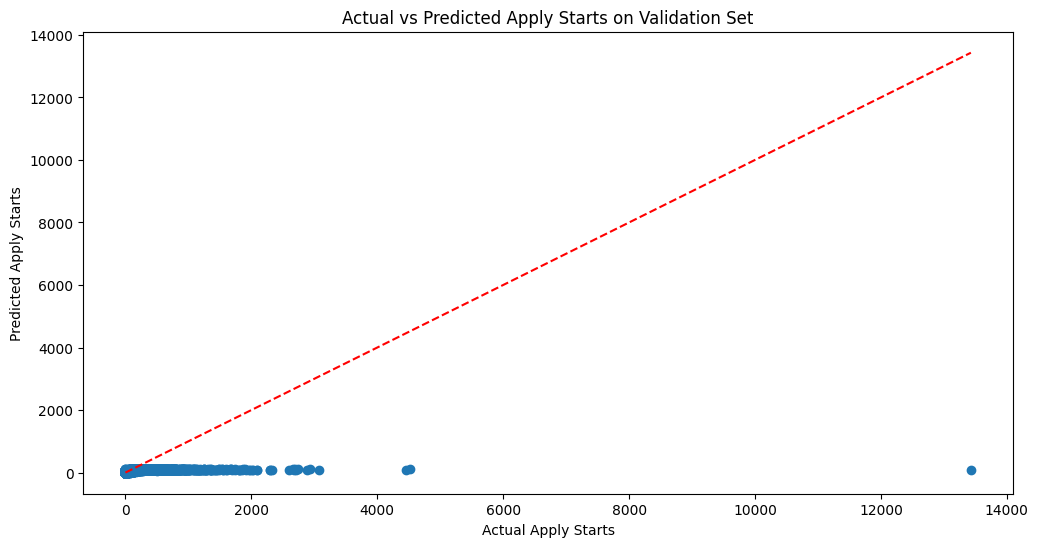

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
import matplotlib.pyplot as plt
import optuna

# Function to preprocess the data
def preprocess_data(df, column_transformer=None, fit_transform=True):
    # Handle missing values
    df.dropna(inplace=True)

    # Separate features and target variable
    X = df.drop(['total_apply_starts'], axis=1)
    y = df['total_apply_starts']

    # Define categorical and numerical columns
    categorical_columns = ['actual_title', 'job_state', 'job_city', 'advertiser_name', 'job_category', 'job_shift', 'employee_count']
    numerical_columns = [col for col in X.columns if col not in categorical_columns]

    # Create a column transformer with one-hot encoding for categorical variables
    if column_transformer is None:
        column_transformer = ColumnTransformer(
            transformers=[
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
                ('num', StandardScaler(), numerical_columns)
            ]
        )

    # Apply transformations
    if fit_transform:
        X = column_transformer.fit_transform(X)
    else:
        X = column_transformer.transform(X)

    return X, y, column_transformer

# Load the datasets
df_train = pd.read_csv('/content/drive/MyDrive/train_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test_data.csv')
df_val = pd.read_csv('/content/drive/MyDrive/val_data.csv')

print("..............done with reading .............. ")

# Downsample the training data for quicker iterations (if needed)
df_train = df_train.sample(frac=0.5, random_state=42)

# Preprocess training data
X_train, y_train, column_transformer = preprocess_data(df_train)
print("..............done with preprocessing train data .............. ")

# Preprocess test data
X_test, y_test, _ = preprocess_data(df_test, column_transformer, fit_transform=False)
print("..............done with preprocessing test data .............. ")

# Preprocess validation data
X_val, y_val, _ = preprocess_data(df_val, column_transformer, fit_transform=False)
print("..............done with preprocessing validation data .............. ")

# Define the objective function for Optuna
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0)
    }

    model = lgb.LGBMRegressor(**param, random_state=42, n_jobs=-1)

    # Using early stopping
    # Remove 'early_stopping_rounds' from the fit method
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='mae')
    y_val_pred = model.predict(X_val, num_iteration=model.best_iteration_)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    return val_mae

# Run Optuna optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Train the final model with the best hyperparameters
best_params = study.best_params
model = lgb.LGBMRegressor(**best_params, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
print("..............done with training model .............. ")

# Evaluate the model on the test set
y_test_pred = model.predict(X_test, num_iteration=model.best_iteration_)
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f'Test Mean Absolute Error: {test_mae}')

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val, num_iteration=model.best_iteration_)
val_mae = mean_absolute_error(y_val, y_val_pred)
print(f'Validation Mean Absolute Error: {val_mae}')

# Plot actual vs predicted values for validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_val, y_val_pred)
plt.xlabel('Actual Apply Starts')
plt.ylabel('Predicted Apply Starts')
plt.title('Actual vs Predicted Apply Starts on Validation Set')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--')
plt.show()

plt.savefig('lightgbm_optimized.png')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
..............done with reading .............. 
..............done with preprocessing train data .............. 
..............done with preprocessing test data .............. 
..............done with preprocessing validation data .............. 
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.269654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9712
[LightGBM] [Info] Number of data points in the train set: 228415, number of used features: 4223
[LightGBM] [Info] Start training from score 5.974761
..............done with training model .............. 
Test Mean Absolute Error (MAE): 4.0191957317586
Test R-squared (R2): 0.2813935025782808
Test Root Mean Squared Error (RMSE): 34.5828082457172
Test Mean Absolute Percentage Error (MAPE): 1057787620418836.5
Test Mean Squared L

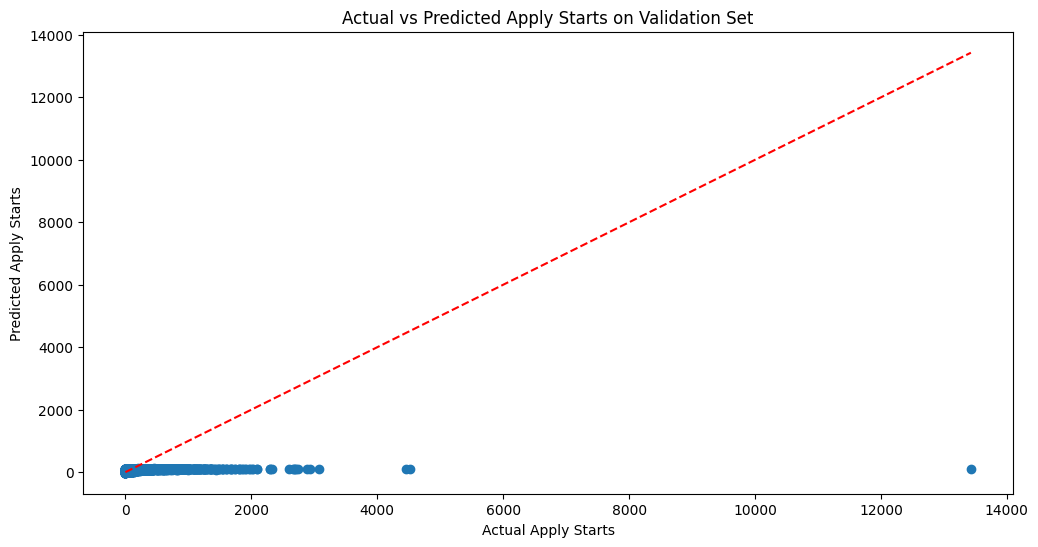

<Figure size 640x480 with 0 Axes>

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to preprocess the data
def preprocess_data(df, column_transformer=None, fit_transform=True):
    # Handle missing values
    df.dropna(inplace=True)

    # Separate features and target variable
    X = df.drop(['total_apply_starts'], axis=1)
    y = df['total_apply_starts']

    # Define categorical and numerical columns
    categorical_columns = ['actual_title', 'job_state', 'job_city', 'advertiser_name', 'job_category', 'job_shift', 'employee_count']
    numerical_columns = [col for col in X.columns if col not in categorical_columns]

    # Create a column transformer with one-hot encoding for categorical variables
    if column_transformer is None:
        column_transformer = ColumnTransformer(
            transformers=[
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
                ('num', StandardScaler(), numerical_columns)
            ]
        )

    # Apply transformations
    if fit_transform:
        X = column_transformer.fit_transform(X)
    else:
        X = column_transformer.transform(X)

    return X, y, column_transformer

# Load the datasets
df_train = pd.read_csv('/content/drive/MyDrive/train_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test_data.csv')
df_val = pd.read_csv('/content/drive/MyDrive/val_data.csv')

print("..............done with reading .............. ")

# Downsample the training data for quicker iterations (if needed)
df_train = df_train.sample(frac=0.1, random_state=42)

# Preprocess training data
X_train, y_train, column_transformer = preprocess_data(df_train)
print("..............done with preprocessing train data .............. ")

# Preprocess test data
X_test, y_test, _ = preprocess_data(df_test, column_transformer, fit_transform=False)
print("..............done with preprocessing test data .............. ")

# Preprocess validation data
X_val, y_val, _ = preprocess_data(df_val, column_transformer, fit_transform=False)
print("..............done with preprocessing validation data .............. ")

# Define the LightGBM model
model = lgb.LGBMRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
model.fit(X_train, y_train)
print("..............done with training model .............. ")
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f'Test Mean Absolute Error (MAE): {test_mae}')
print(f'Test R-squared (R2): {test_r2}')
print(f'Test Root Mean Squared Error (RMSE): {test_rmse}')
print(f'Test Mean Absolute Percentage Error (MAPE): {test_mape}')

# MSLE calculation, only if no negative values in target
if (y_test >= 0).all() and (y_test_pred >= 0).all():
    test_msle = mean_squared_log_error(y_test, y_test_pred)
    print(f'Test Mean Squared Logarithmic Error (MSLE): {test_msle}')
else:
    print("Test Mean Squared Logarithmic Error (MSLE) not calculated due to negative values in targets or predictions.")

# Evaluate the model on the validation set with additional metrics
y_val_pred = model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
val_rmse = root_mean_squared_error(y_val, y_val_pred)
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)

print(f'Validation Mean Absolute Error (MAE): {val_mae}')
print(f'Validation R-squared (R2): {val_r2}')
print(f'Validation Root Mean Squared Error (RMSE): {val_rmse}')
print(f'Validation Mean Absolute Percentage Error (MAPE): {val_mape}')

# MSLE calculation, only if no negative values in target
if (y_val >= 0).all() and (y_val_pred >= 0).all():
    val_msle = mean_squared_log_error(y_val, y_val_pred)
    print(f'Validation Mean Squared Logarithmic Error (MSLE): {val_msle}')
else:
    print("Validation Mean Squared Logarithmic Error (MSLE) not calculated due to negative values in targets or predictions.")

# Plot actual vs predicted values for validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_val, y_val_pred)
plt.xlabel('Actual Apply Starts')
plt.ylabel('Predicted Apply Starts')
plt.title('Actual vs Predicted Apply Starts on Validation Set')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--')
plt.show()

plt.savefig('lightgbm.png')


..............done with reading .............. 
['actual_title', 'job_state', 'job_city', 'advertiser_name', 'job_category', 'job_shift', 'employee_count']
['Unnamed: 0', 'id', 'total_impressions', 'total_clicks', 'job_salary', 'imputed', 'CTR', 'ATR', 'CAR']
..............done with preprocessing train data .............. 
['actual_title', 'job_state', 'job_city', 'advertiser_name', 'job_category', 'job_shift', 'employee_count']
['Unnamed: 0', 'id', 'total_impressions', 'total_clicks', 'job_salary', 'imputed', 'CTR', 'ATR', 'CAR']
..............done with preprocessing test data .............. 
['actual_title', 'job_state', 'job_city', 'advertiser_name', 'job_category', 'job_shift', 'employee_count']
['Unnamed: 0', 'id', 'total_impressions', 'total_clicks', 'job_salary', 'imputed', 'CTR', 'ATR', 'CAR']
..............done with preprocessing validation data .............. 
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.196264 seconds.
You can set `

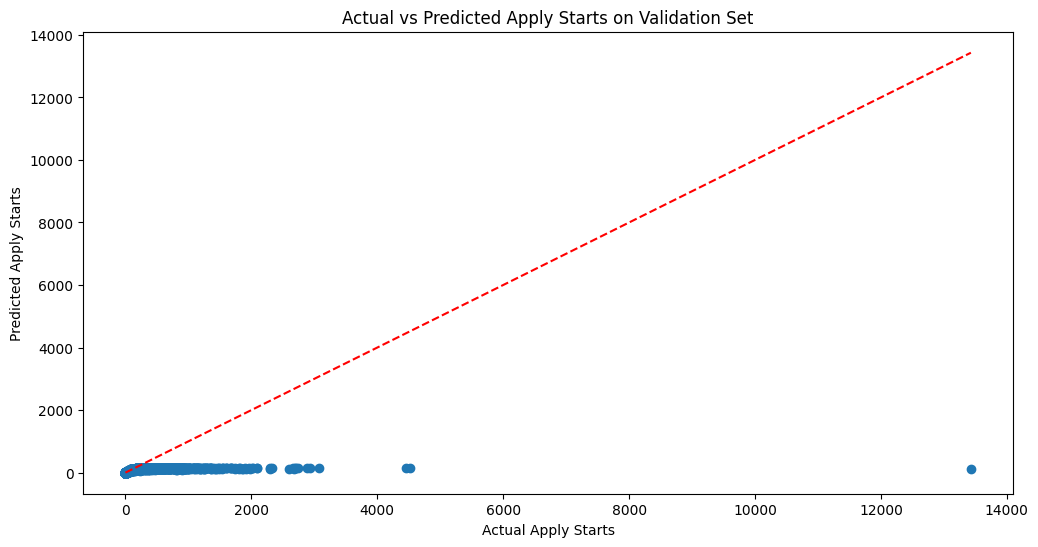

<Figure size 640x480 with 0 Axes>

In [ ]:
# mount google drive
from google.colab import drive

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to preprocess the data
def preprocess_data(df, column_transformer=None, fit_transform=True):
    # Handle missing values
    df.dropna(inplace=True)

    df = calculate_additional_metrics(df)

    # Separate features and target variable
    X = df.drop(['total_apply_starts'], axis=1)
    y = df['total_apply_starts']


    # Define categorical and numerical columns
    categorical_columns = ['actual_title', 'job_state', 'job_city', 'advertiser_name', 'job_category', 'job_shift', 'employee_count']
    numerical_columns = [col for col in X.columns if col not in categorical_columns]

    print(categorical_columns)
    print(numerical_columns )

    # Create a column transformer with one-hot encoding for categorical variables
    if column_transformer is None:
        column_transformer = ColumnTransformer(
            transformers=[
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
                ('num', StandardScaler(), numerical_columns)
            ]
        )

    # Apply transformations
    if fit_transform:
        X = column_transformer.fit_transform(X)
    else:
        X = column_transformer.transform(X)

    return X, y, column_transformer

# Load the datasets
df_train = pd.read_csv('/content/drive/MyDrive/train_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test_data.csv')
df_val = pd.read_csv('/content/drive/MyDrive/val_data.csv')

print("..............done with reading .............. ")

# Downsample the training data for quicker iterations (if needed)
df_train = df_train.sample(frac=0.1, random_state=42)

# Preprocess training data
X_train, y_train, column_transformer = preprocess_data(df_train)
print("..............done with preprocessing train data .............. ")

# Preprocess test data
X_test, y_test, _ = preprocess_data(df_test, column_transformer, fit_transform=False)
print("..............done with preprocessing test data .............. ")

# Preprocess validation data
X_val, y_val, _ = preprocess_data(df_val, column_transformer, fit_transform=False)
print("..............done with preprocessing validation data .............. ")

# Define the LightGBM model
model = lgb.LGBMRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
model.fit(X_train, y_train)
print("..............done with training model .............. ")
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f'Test Mean Absolute Error (MAE): {test_mae}')
print(f'Test R-squared (R2): {test_r2}')
print(f'Test Root Mean Squared Error (RMSE): {test_rmse}')
print(f'Test Mean Absolute Percentage Error (MAPE): {test_mape}')

# MSLE calculation, only if no negative values in target
if (y_test >= 0).all() and (y_test_pred >= 0).all():
    test_msle = mean_squared_log_error(y_test, y_test_pred)
    print(f'Test Mean Squared Logarithmic Error (MSLE): {test_msle}')
else:
    print("Test Mean Squared Logarithmic Error (MSLE) not calculated due to negative values in targets or predictions.")

# Evaluate the model on the validation set with additional metrics
y_val_pred = model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
val_rmse = root_mean_squared_error(y_val, y_val_pred)
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)

print(f'Validation Mean Absolute Error (MAE): {val_mae}')
print(f'Validation R-squared (R2): {val_r2}')
print(f'Validation Root Mean Squared Error (RMSE): {val_rmse}')
print(f'Validation Mean Absolute Percentage Error (MAPE): {val_mape}')

# MSLE calculation, only if no negative values in target
if (y_val >= 0).all() and (y_val_pred >= 0).all():
    val_msle = mean_squared_log_error(y_val, y_val_pred)
    print(f'Validation Mean Squared Logarithmic Error (MSLE): {val_msle}')
else:
    print("Validation Mean Squared Logarithmic Error (MSLE) not calculated due to negative values in targets or predictions.")

# Plot actual vs predicted values for validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_val, y_val_pred)
plt.xlabel('Actual Apply Starts')
plt.ylabel('Predicted Apply Starts')
plt.title('Actual vs Predicted Apply Starts on Validation Set')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--')
plt.show()

plt.savefig('lightgbm.png')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
..............done with reading .............. 
..............done with preprocessing train data .............. 
..............done with preprocessing test data .............. 
..............done with preprocessing validation data .............. 
..............done with training model .............. 
Test Mean Absolute Error (MAE): 1.5076945338285426
Test R-squared (R2): 0.35557346032966
Test Root Mean Squared Error (RMSE): 32.74925280262082
Test Mean Absolute Percentage Error (MAPE): 21003732297565.312
Test Mean Squared Logarithmic Error (MSLE) not calculated due to negative values in targets or predictions.
Validation Mean Absolute Error (MAE): 1.4011965056974665
Validation R-squared (R2): 0.37949044584723624
Validation Root Mean Squared Error (RMSE): 30.34073717860089
Validation Mean Absolute Percentage Error (MAPE): 21239331661868.203
Validation Mean Squa

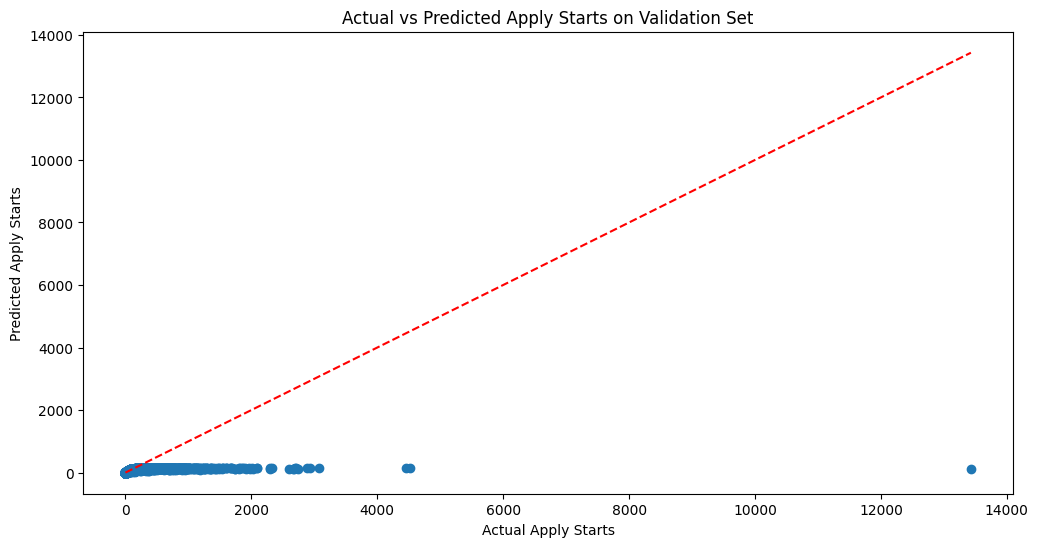

<Figure size 640x480 with 0 Axes>

In [ ]:
#xgboost without p

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_additional_metrics(df):
    df['CTR'] = df['total_clicks'] / df['total_impressions']
    df['ATR'] = df['total_apply_starts'] / df['total_impressions']
    df['CAR'] = df['total_apply_starts'] / df['total_clicks']

    # Replace infinite values with NaN and handle missing values if any
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace=True)
    return df

# Function to preprocess the data
def preprocess_data(df, column_transformer=None, fit_transform=True):
    # Handle missing values
    df.dropna(inplace=True)

    df = calculate_additional_metrics(df)

    # Separate features and target variable
    X = df.drop(['total_apply_starts'], axis=1)
    y = df['total_apply_starts']


    # Define categorical and numerical columns
    categorical_columns = ['actual_title', 'job_state', 'job_city', 'advertiser_name', 'job_category', 'job_shift', 'employee_count']
    numerical_columns = [col for col in X.columns if col not in categorical_columns]

    # Create a column transformer with one-hot encoding for categorical variables
    if column_transformer is None:
        column_transformer = ColumnTransformer(
            transformers=[
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
                ('num', StandardScaler(), numerical_columns)
            ]
        )

    # Apply transformations
    if fit_transform:
        X = column_transformer.fit_transform(X)
    else:
        X = column_transformer.transform(X)

    return X, y, column_transformer

# Load the datasets
df_train = pd.read_csv('/content/drive/MyDrive/train_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test_data.csv')
df_val = pd.read_csv('/content/drive/MyDrive/val_data.csv')

print("..............done with reading .............. ")

# Downsample the training data for quicker iterations (if needed)
df_train = df_train.sample(frac=0.1, random_state=42)

# Preprocess training data
X_train, y_train, column_transformer = preprocess_data(df_train)
print("..............done with preprocessing train data .............. ")

# Preprocess test data
X_test, y_test, _ = preprocess_data(df_test, column_transformer, fit_transform=False)
print("..............done with preprocessing test data .............. ")

# Preprocess validation data
X_val, y_val, _ = preprocess_data(df_val, column_transformer, fit_transform=False)
print("..............done with preprocessing validation data .............. ")

# Define the XGBoost model
model = xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
model.fit(X_train, y_train)
print("..............done with training model .............. ")
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f'Test Mean Absolute Error (MAE): {test_mae}')
print(f'Test R-squared (R2): {test_r2}')
print(f'Test Root Mean Squared Error (RMSE): {test_rmse}')
print(f'Test Mean Absolute Percentage Error (MAPE): {test_mape}')

# MSLE calculation, only if no negative values in target
if (y_test >= 0).all() and (y_test_pred >= 0).all():
    test_msle = mean_squared_log_error(y_test, y_test_pred)
    print(f'Test Mean Squared Logarithmic Error (MSLE): {test_msle}')
else:
    print("Test Mean Squared Logarithmic Error (MSLE) not calculated due to negative values in targets or predictions.")

# Evaluate the model on the validation set with additional metrics
y_val_pred = model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
val_rmse = root_mean_squared_error(y_val, y_val_pred)
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)

print(f'Validation Mean Absolute Error (MAE): {val_mae}')
print(f'Validation R-squared (R2): {val_r2}')
print(f'Validation Root Mean Squared Error (RMSE): {val_rmse}')
print(f'Validation Mean Absolute Percentage Error (MAPE): {val_mape}')

# MSLE calculation, only if no negative values in target
if (y_val >= 0).all() and (y_val_pred >= 0).all():
    val_msle = mean_squared_log_error(y_val, y_val_pred)
    print(f'Validation Mean Squared Logarithmic Error (MSLE): {val_msle}')
else:
    print("Validation Mean Squared Logarithmic Error (MSLE) not calculated due to negative values in targets or predictions.")

# Plot actual vs predicted values for validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_val, y_val_pred)
plt.xlabel('Actual Apply Starts')
plt.ylabel('Predicted Apply Starts')
plt.title('Actual vs Predicted Apply Starts on Validation Set')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--')
plt.show()

plt.savefig('xgboost.png')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
..............done with reading .............. 
..............done with preprocessing train data .............. 
..............done with preprocessing test data .............. 
..............done with preprocessing validation data .............. 
..............done with training model .............. 
Test Mean Absolute Error (MAE): 4.091177428982057
Test R-squared (R2): 0.26356999086505095
Test Root Mean Squared Error (RMSE): 35.009058024069
Test Mean Absolute Percentage Error (MAPE): 1035488568098689.4
Test Mean Squared Logarithmic Error (MSLE) not calculated due to negative values in targets or predictions.
Validation Mean Absolute Error (MAE): 3.9712418948593378
Validation R-squared (R2): 0.2820819875379158
Validation Root Mean Squared Error (RMSE): 32.635428325805314
Validation Mean Absolute Percentage Error (MAPE): 1037066684314080.4
Validation Mean Squa

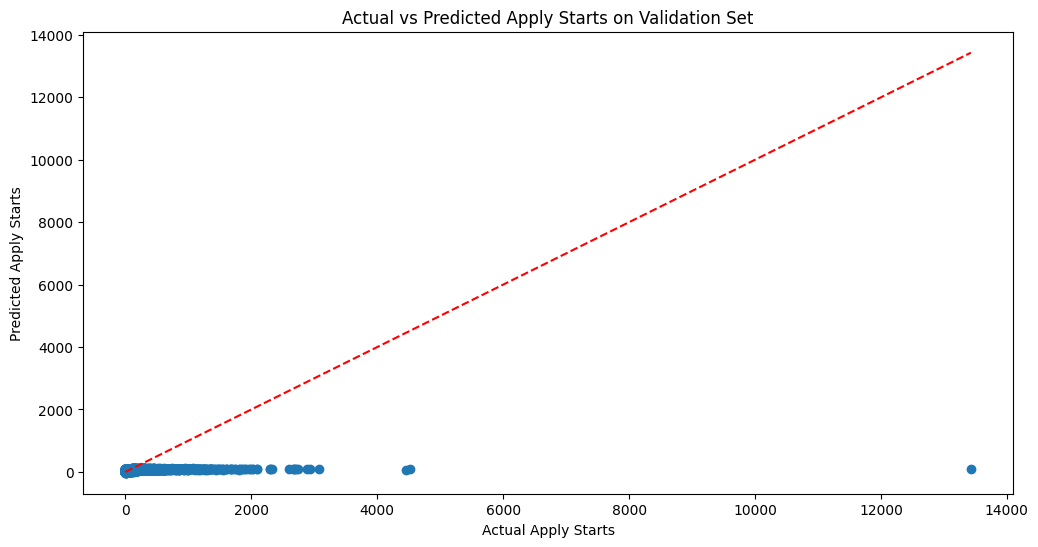

<Figure size 640x480 with 0 Axes>

In [ ]:
#xgboost with pca

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_additional_metrics(df):
    df['CTR'] = df['total_clicks'] / df['total_impressions']
    df['ATR'] = df['total_apply_starts'] / df['total_impressions']
    df['CAR'] = df['total_apply_starts'] / df['total_clicks']

    # Replace infinite values with NaN and handle missing values if any
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace=True)
    return df

# Function to preprocess the data
def preprocess_data(df, column_transformer=None, fit_transform=True):
    # Handle missing values
    df.dropna(inplace=True)

    #df = calculate_additional_metrics(df)

    # Separate features and target variable
    X = df.drop(['total_apply_starts'], axis=1)
    y = df['total_apply_starts']


    # Define categorical and numerical columns
    categorical_columns = ['actual_title', 'job_state', 'job_city', 'advertiser_name', 'job_category', 'job_shift', 'employee_count']
    numerical_columns = [col for col in X.columns if col not in categorical_columns]

    # Create a column transformer with one-hot encoding for categorical variables
    if column_transformer is None:
        column_transformer = ColumnTransformer(
            transformers=[
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
                ('num', StandardScaler(), numerical_columns)
            ]
        )

    # Apply transformations
    if fit_transform:
        X = column_transformer.fit_transform(X)
    else:
        X = column_transformer.transform(X)

    return X, y, column_transformer

# Load the datasets
df_train = pd.read_csv('/content/drive/MyDrive/train_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test_data.csv')
df_val = pd.read_csv('/content/drive/MyDrive/val_data.csv')

print("..............done with reading .............. ")

# Downsample the training data for quicker iterations (if needed)
df_train = df_train.sample(frac=0.1, random_state=42)

# Preprocess training data
X_train, y_train, column_transformer = preprocess_data(df_train)
print("..............done with preprocessing train data .............. ")

# Preprocess test data
X_test, y_test, _ = preprocess_data(df_test, column_transformer, fit_transform=False)
print("..............done with preprocessing test data .............. ")

# Preprocess validation data
X_val, y_val, _ = preprocess_data(df_val, column_transformer, fit_transform=False)
print("..............done with preprocessing validation data .............. ")

# Define the XGBoost model
model = xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
model.fit(X_train, y_train)
print("..............done with training model .............. ")
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f'Test Mean Absolute Error (MAE): {test_mae}')
print(f'Test R-squared (R2): {test_r2}')
print(f'Test Root Mean Squared Error (RMSE): {test_rmse}')
print(f'Test Mean Absolute Percentage Error (MAPE): {test_mape}')

# MSLE calculation, only if no negative values in target
if (y_test >= 0).all() and (y_test_pred >= 0).all():
    test_msle = mean_squared_log_error(y_test, y_test_pred)
    print(f'Test Mean Squared Logarithmic Error (MSLE): {test_msle}')
else:
    print("Test Mean Squared Logarithmic Error (MSLE) not calculated due to negative values in targets or predictions.")

# Evaluate the model on the validation set with additional metrics
y_val_pred = model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
val_rmse = root_mean_squared_error(y_val, y_val_pred)
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)

print(f'Validation Mean Absolute Error (MAE): {val_mae}')
print(f'Validation R-squared (R2): {val_r2}')
print(f'Validation Root Mean Squared Error (RMSE): {val_rmse}')
print(f'Validation Mean Absolute Percentage Error (MAPE): {val_mape}')

# MSLE calculation, only if no negative values in target
if (y_val >= 0).all() and (y_val_pred >= 0).all():
    val_msle = mean_squared_log_error(y_val, y_val_pred)
    print(f'Validation Mean Squared Logarithmic Error (MSLE): {val_msle}')
else:
    print("Validation Mean Squared Logarithmic Error (MSLE) not calculated due to negative values in targets or predictions.")

# Plot actual vs predicted values for validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_val, y_val_pred)
plt.xlabel('Actual Apply Starts')
plt.ylabel('Predicted Apply Starts')
plt.title('Actual vs Predicted Apply Starts on Validation Set')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--')
plt.show()

plt.savefig('xgboost.png')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
..............done with reading .............. 
..............done with preprocessing train data .............. 
..............done with preprocessing test data .............. 
..............done with preprocessing validation data .............. 
..............done with training model .............. 
Test Mean Absolute Error (MAE): 1.6198371217415966
Test R-squared (R2): 0.4039918131394602
Test Root Mean Squared Error (RMSE): 31.494941023965776
Test Mean Absolute Percentage Error (MAPE): 272757187771979.62
Test Mean Squared Logarithmic Error (MSLE) not calculated due to negative values in targets or predictions.
Validation Mean Absolute Error (MAE): 1.516972582777329
Validation R-squared (R2): 0.42878794574233403
Validation Root Mean Squared Error (RMSE): 29.11056093181795
Validation Mean Absolute Percentage Error (MAPE): 272759169708844.0
Validation Mean Squ

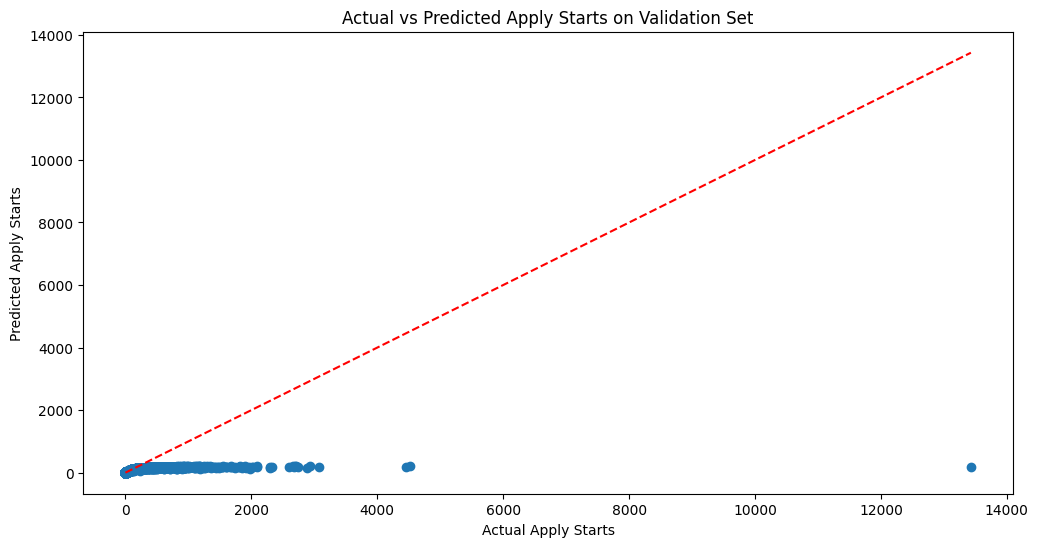

<Figure size 640x480 with 0 Axes>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_additional_metrics(df):
    df['CTR'] = df['total_clicks'] / df['total_impressions']
    df['ATR'] = df['total_apply_starts'] / df['total_impressions']
    df['CAR'] = df['total_apply_starts'] / df['total_clicks']

    # Replace infinite values with NaN and handle missing values if any
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace=True)
    return df

# Function to preprocess the data
def preprocess_data(df, column_transformer=None, fit_transform=True):
    # Handle missing values
    df.dropna(inplace=True)

    df = calculate_additional_metrics(df)

    # Separate features and target variable
    X = df.drop(['total_apply_starts'], axis=1)
    y = df['total_apply_starts']


    # Define categorical and numerical columns
    categorical_columns = ['actual_title', 'job_state', 'job_city', 'advertiser_name', 'job_category', 'job_shift', 'employee_count']
    numerical_columns = [col for col in X.columns if col not in categorical_columns]

    # Create a column transformer with one-hot encoding for categorical variables
    if column_transformer is None:
        column_transformer = ColumnTransformer(
            transformers=[
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
                ('num', StandardScaler(), numerical_columns)
            ]
        )

    # Apply transformations
    if fit_transform:
        X = column_transformer.fit_transform(X)
    else:
        X = column_transformer.transform(X)

    return X, y, column_transformer

# Load the datasets
df_train = pd.read_csv('/content/drive/MyDrive/train_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test_data.csv')
df_val = pd.read_csv('/content/drive/MyDrive/val_data.csv')

print("..............done with reading .............. ")

# Downsample the training data for quicker iterations (if needed)
df_train = df_train.sample(frac=0.1, random_state=42)

# Preprocess training data
X_train, y_train, column_transformer = preprocess_data(df_train)
print("..............done with preprocessing train data .............. ")

# Preprocess test data
X_test, y_test, _ = preprocess_data(df_test, column_transformer, fit_transform=False)
print("..............done with preprocessing test data .............. ")

# Preprocess validation data
X_val, y_val, _ = preprocess_data(df_val, column_transformer, fit_transform=False)
print("..............done with preprocessing validation data .............. ")

# Define the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)
print("..............done with training model .............. ")
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f'Test Mean Absolute Error (MAE): {test_mae}')
print(f'Test R-squared (R2): {test_r2}')
print(f'Test Root Mean Squared Error (RMSE): {test_rmse}')
print(f'Test Mean Absolute Percentage Error (MAPE): {test_mape}')

# MSLE calculation, only if no negative values in target
if (y_test >= 0).all() and (y_test_pred >= 0).all():
    test_msle = mean_squared_log_error(y_test, y_test_pred)
    print(f'Test Mean Squared Logarithmic Error (MSLE): {test_msle}')
else:
    print("Test Mean Squared Logarithmic Error (MSLE) not calculated due to negative values in targets or predictions.")

# Evaluate the model on the validation set with additional metrics
y_val_pred = model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
val_rmse = root_mean_squared_error(y_val, y_val_pred)
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)

print(f'Validation Mean Absolute Error (MAE): {val_mae}')
print(f'Validation R-squared (R2): {val_r2}')
print(f'Validation Root Mean Squared Error (RMSE): {val_rmse}')
print(f'Validation Mean Absolute Percentage Error (MAPE): {val_mape}')

# MSLE calculation, only if no negative values in target
if (y_val >= 0).all() and (y_val_pred >= 0).all():
    val_msle = mean_squared_log_error(y_val, y_val_pred)
    print(f'Validation Mean Squared Logarithmic Error (MSLE): {val_msle}')
else:
    print("Validation Mean Squared Logarithmic Error (MSLE) not calculated due to negative values in targets or predictions.")

# Plot actual vs predicted values for validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_val, y_val_pred)
plt.xlabel('Actual Apply Starts')
plt.ylabel('Predicted Apply Starts')
plt.title('Actual vs Predicted Apply Starts on Validation Set')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--')
plt.show()

plt.savefig('gboost.png')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
..............done with reading .............. 
..............done with preprocessing train data .............. 
..............done with preprocessing test data .............. 
..............done with preprocessing validation data .............. 
..............done with training model .............. 
Test Mean Absolute Error (MAE): 4.208295336171684
Test R-squared (R2): 0.2654364639261201
Test Root Mean Squared Error (RMSE): 34.964664858057056
Test Mean Absolute Percentage Error (MAPE): 1187564604508369.8
Test Mean Squared Logarithmic Error (MSLE) not calculated due to negative values in targets or predictions.
Validation Mean Absolute Error (MAE): 4.087760838338155
Validation R-squared (R2): 0.28400656971607574
Validation Root Mean Squared Error (RMSE): 32.59165472362702
Validation Mean Absolute Percentage Error (MAPE): 1193357765666206.8
Validation Mean Squ

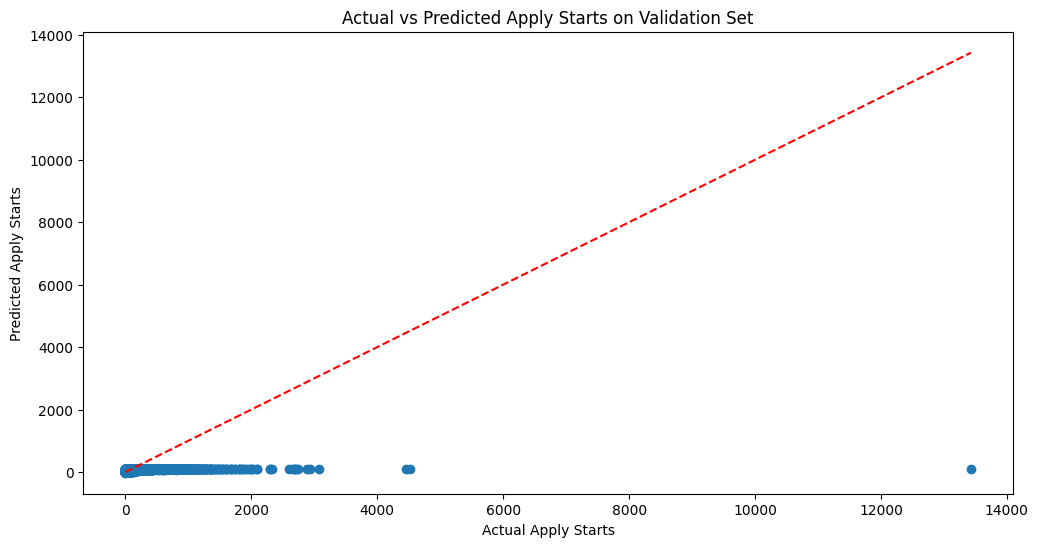

<Figure size 640x480 with 0 Axes>

In [ ]:
#GradientBoostingRegressor with pca

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_additional_metrics(df):
    df['CTR'] = df['total_clicks'] / df['total_impressions']
    df['ATR'] = df['total_apply_starts'] / df['total_impressions']
    df['CAR'] = df['total_apply_starts'] / df['total_clicks']

    # Replace infinite values with NaN and handle missing values if any
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace=True)
    return df

# Function to preprocess the data
def preprocess_data(df, column_transformer=None, fit_transform=True):
    # Handle missing values
    df.dropna(inplace=True)

    #df = calculate_additional_metrics(df)

    # Separate features and target variable
    X = df.drop(['total_apply_starts'], axis=1)
    y = df['total_apply_starts']


    # Define categorical and numerical columns
    categorical_columns = ['actual_title', 'job_state', 'job_city', 'advertiser_name', 'job_category', 'job_shift', 'employee_count']
    numerical_columns = [col for col in X.columns if col not in categorical_columns]

    # Create a column transformer with one-hot encoding for categorical variables
    if column_transformer is None:
        column_transformer = ColumnTransformer(
            transformers=[
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
                ('num', StandardScaler(), numerical_columns)
            ]
        )

    # Apply transformations
    if fit_transform:
        X = column_transformer.fit_transform(X)
    else:
        X = column_transformer.transform(X)

    return X, y, column_transformer

# Load the datasets
df_train = pd.read_csv('/content/drive/MyDrive/train_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test_data.csv')
df_val = pd.read_csv('/content/drive/MyDrive/val_data.csv')

print("..............done with reading .............. ")

# Downsample the training data for quicker iterations (if needed)
df_train = df_train.sample(frac=0.1, random_state=42)

# Preprocess training data
X_train, y_train, column_transformer = preprocess_data(df_train)
print("..............done with preprocessing train data .............. ")

# Preprocess test data
X_test, y_test, _ = preprocess_data(df_test, column_transformer, fit_transform=False)
print("..............done with preprocessing test data .............. ")

# Preprocess validation data
X_val, y_val, _ = preprocess_data(df_val, column_transformer, fit_transform=False)
print("..............done with preprocessing validation data .............. ")

# Define the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)
print("..............done with training model .............. ")
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f'Test Mean Absolute Error (MAE): {test_mae}')
print(f'Test R-squared (R2): {test_r2}')
print(f'Test Root Mean Squared Error (RMSE): {test_rmse}')
print(f'Test Mean Absolute Percentage Error (MAPE): {test_mape}')

# MSLE calculation, only if no negative values in target
if (y_test >= 0).all() and (y_test_pred >= 0).all():
    test_msle = mean_squared_log_error(y_test, y_test_pred)
    print(f'Test Mean Squared Logarithmic Error (MSLE): {test_msle}')
else:
    print("Test Mean Squared Logarithmic Error (MSLE) not calculated due to negative values in targets or predictions.")

# Evaluate the model on the validation set with additional metrics
y_val_pred = model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
val_rmse = root_mean_squared_error(y_val, y_val_pred)
val_mape = mean_absolute_percentage_error(y_val, y_val_pred)

print(f'Validation Mean Absolute Error (MAE): {val_mae}')
print(f'Validation R-squared (R2): {val_r2}')
print(f'Validation Root Mean Squared Error (RMSE): {val_rmse}')
print(f'Validation Mean Absolute Percentage Error (MAPE): {val_mape}')

# MSLE calculation, only if no negative values in target
if (y_val >= 0).all() and (y_val_pred >= 0).all():
    val_msle = mean_squared_log_error(y_val, y_val_pred)
    print(f'Validation Mean Squared Logarithmic Error (MSLE): {val_msle}')
else:
    print("Validation Mean Squared Logarithmic Error (MSLE) not calculated due to negative values in targets or predictions.")

# Plot actual vs predicted values for validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_val, y_val_pred)
plt.xlabel('Actual Apply Starts')
plt.ylabel('Predicted Apply Starts')
plt.title('Actual vs Predicted Apply Starts on Validation Set')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--')
plt.show()

plt.savefig('gboost.png')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
..............done with reading .............. 
..............done with preprocessing train data .............. 
..............done with preprocessing test data .............. 
..............done with preprocessing validation data .............. 
Fitting 2 folds for each of 25 candidates, totalling 50 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}